In [7]:
import krstc_utils as kutils
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/global/homes/f/fnafis/utils_nf/nfuad.mpl')
import h5py
import json

In [8]:
# read skip_cycle_dict.json to skip cycles
with open('skip_cycle_dict.json', 'r') as f:
    sc_dict = json.load(f)
sc_dict

{'77': [3377],
 '92': [3876, 3877],
 '71': [3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303]}

# all ToE plots

/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3304_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3305_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3306_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3307_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3308_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3309_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3310_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3311_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3312_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3313_dsp.lh5
/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run71_cyc3314_dsp.lh5
11 files found with run 71, expected:21
71--kry--4.406702943236112 hrs--2023/04/25, bias 2300 V, closed turbopump valve, source still open


Text(0, 0.5, 'ToE')

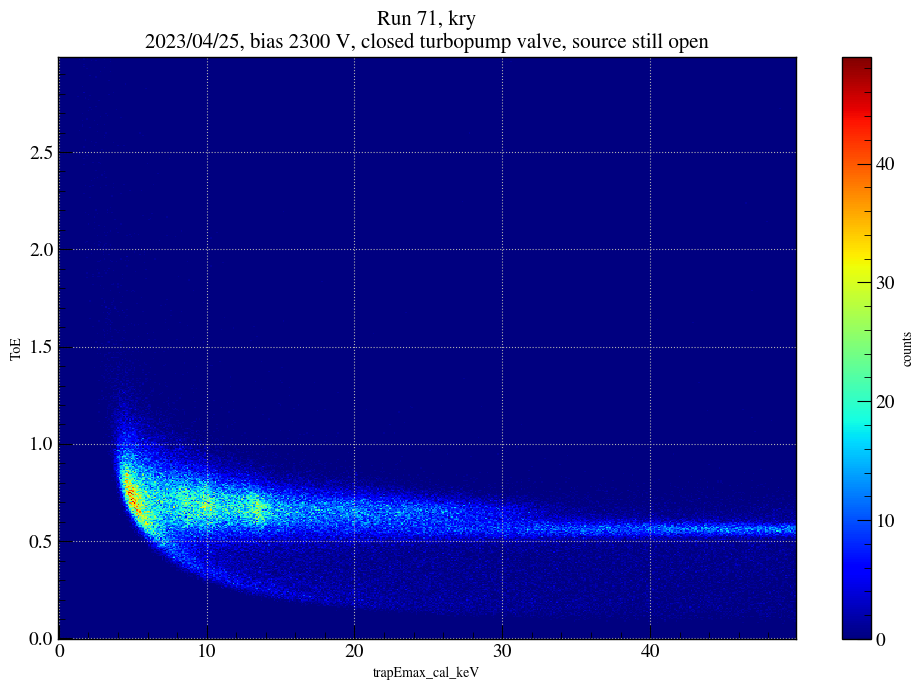

In [10]:
run = 71
skip_cycles = None
if str(run) in sc_dict.keys():
    skip_cycles = sc_dict[str(run)]

# load dsp
df, runtype, description = kutils.load_dsp(run, skip_cycles=skip_cycles, params=[['trapEmax', 'triE', 'stp_20', 'tp_0', 'tp_50']], verbose=True)
df['ToE'] = df['triE'] / df['trapEmax']

#print(run, df.cycle.unique())

plt.figure()
toe = kutils.get_2D_hist(df['trapEmax_cal_keV'], df['ToE'], df['runtime_s'], ranges=[[0,50],[0,3]], binsizes=[0.1, 0.006], cbar_label='counts')
plt.title(f'Run {run}'+', '+runtype+'\n'+description)
plt.xlabel('trapEmax_cal_keV')
plt.ylabel('ToE')

       trapEmax_cal_keV       ToE  run  cycle
39627          5.052020  0.814941   91   3864
14500          5.040936  0.860667   91   3862
43432          5.004893  0.884682   91   3862
83730          5.059900  0.883658   91   3862
5577           5.009439  0.866272   91   3862
61184          5.000731  0.814700   91   3863
89013          5.019786  0.846683   91   3862
42130          5.000958  0.850045   91   3863
60460          5.043367  0.816027   91   3863
49237          5.017807  0.855917   91   3862
24686          5.031594  0.818270   91   3862
7007           5.007341  0.893182   91   3862
26851          5.035658  0.888053   91   3862
46314          5.087304  0.852614   91   3863
44374          5.020321  0.881988   91   3862
33247          5.060366  0.822202   91   3862
34602          5.031738  0.853594   91   3862
63464          5.060616  0.839776   91   3862
31157          5.043671  0.886676   91   3863
69924          5.066129  0.830049   91   3862
75749          5.004660  0.822852 

(27000.0, 29000.0)

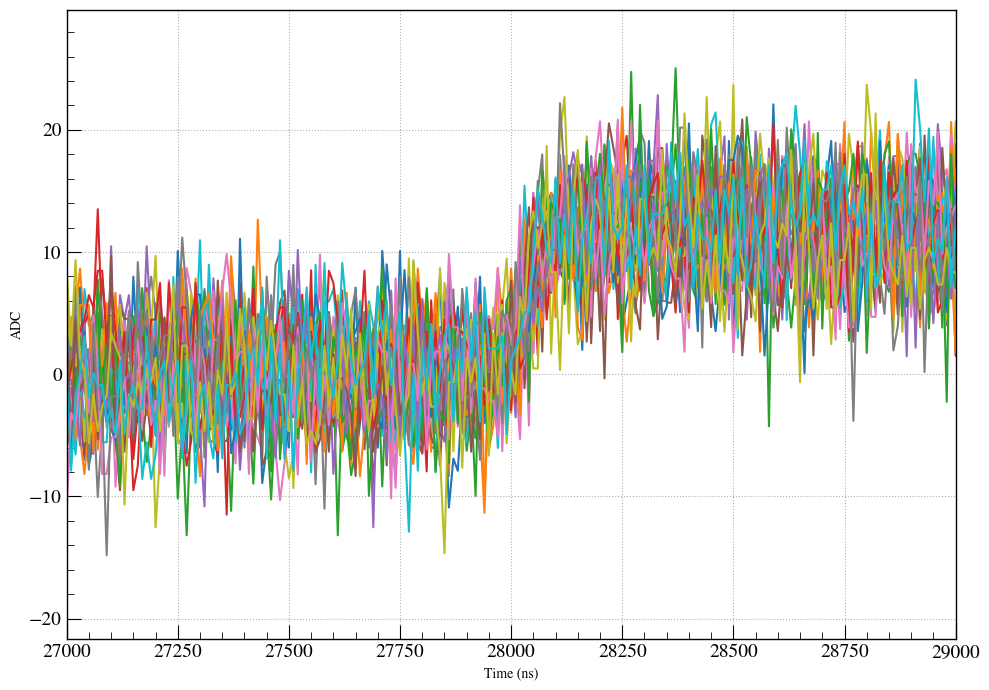

In [54]:
toe_range = [0.8,0.9]
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])

df = df[(df['trapEmax_cal_keV'] > 5) & (df['trapEmax_cal_keV']<5.1) & toe_cut]
d = df.sample(n=30, random_state=3)

wfs = kutils.get_raw_wfs(d, align_at='stp_20', lw=1.5, display_params=['trapEmax_cal_keV', 'ToE'])
plt.xlim(27000, 29000)

# campaign 10

In [91]:
run = 66
df, runtype = kutils.load_dsp(run=run, 
                        skip_cycles=list(np.arange(3579,3599)),
                        params=[['trapEmax', 'triE', 'tp_0', 'tp_50', 'stp_20', 'tp_max']], 
                        all_columns=True, 
                        verbose=False)
df ['ToE'] = df['triE'] / df['trapEmax']
print(df.cycle.unique())
df

<KeysViewHDF5 ['A_avg', 'A_gaus', 'bl', 'bl_intercept', 'bl_sig', 'bl_slope', 'channel', 'dcr', 'energy', 'ftp', 'stp_02', 'stp_05', 'stp_10', 'stp_20', 'stp_max', 'stp_min', 'swf_max', 'swf_min', 'timestamp', 'tmax', 'tp_0', 'tp_02', 'tp_05', 'tp_10', 'tp_20', 'tp_50', 'tp_90', 'tp_96', 'tp_max', 'tp_min', 'trapEftp', 'trapEmax', 'trapTmax', 'triE', 'wf_max', 'wf_min']>
[3230 3231 3232 ... 3247 3248 3249]


,trapEmax,triE,tp_0,tp_50,stp_20,tp_max,trapEmax_cal_keV,pulse_rise_time_ns,run,cycle,runtime_s,ToE
0,2496.537842,1479.511841,39590.0,40270.0,40150.0,40510.0,1076.139771,560.0,66,3230,1498.680678,0.592625
1,2325.093994,1353.743774,39480.0,40460.0,40340.0,40690.0,1002.247498,860.0,66,3230,1498.680678,0.582232
2,3123.234863,1787.239624,39800.0,40230.0,40120.0,40500.0,1346.246216,320.0,66,3230,1498.680678,0.572240
3,161.430023,40.128727,38960.0,39980.0,39810.0,41080.0,69.708344,850.0,66,3230,1498.680678,0.248583
4,99.942818,61.132835,38180.0,39880.0,39750.0,40770.0,43.207355,1570.0,66,3230,1498.680678,0.611678
...,...,...,...,...,...,...,...,...,...,...,...,...
66500,1391.307983,798.658386,39670.0,40300.0,40180.0,40770.0,599.785767,510.0,66,3249,802.401791,0.574034
66501,13.400205,11.305168,38190.0,48270.0,38240.0,48270.0,5.907488,50.0,66,3249,802.401791,0.843656
66502,815.051270,478.280579,39390.0,40260.0,40140.0,40500.0,351.419067,750.0,66,3249,802.401791,0.586810
66503,246.350723,145.576248,39470.0,39980.0,39870.0,40500.0,106.309166,400.0,66,3249,802.401791,0.590931


Text(0, 0.5, 'ToE')

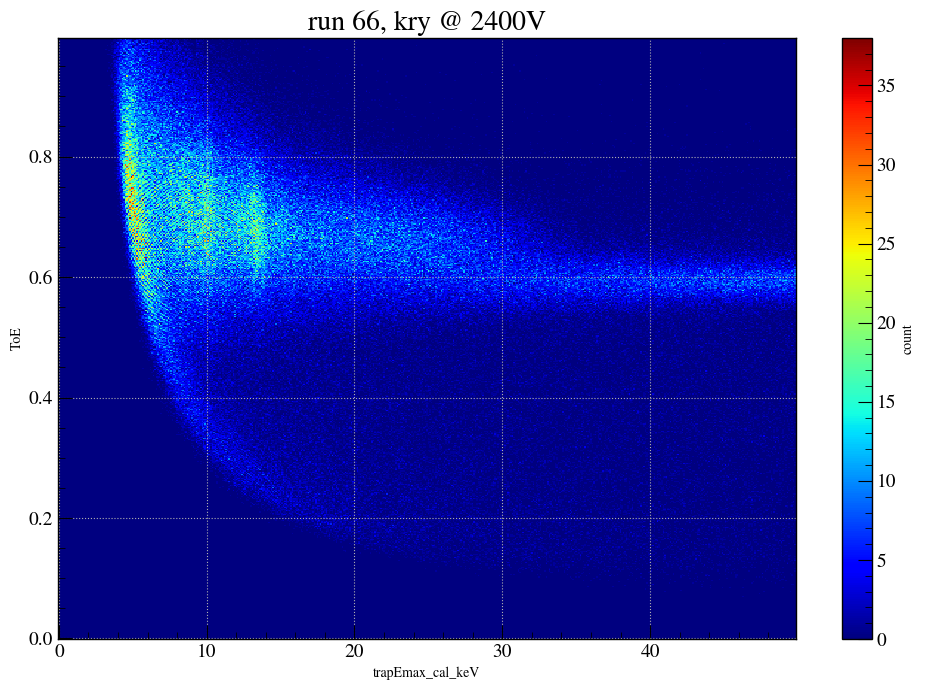

In [92]:
a = kutils.get_2D_hist(df.trapEmax_cal_keV, df.ToE, df.runtime_s, ranges=[[0,50],[0,1]], binsizes=[0.1, 0.002], log=False, vlim=None, cbar_label='count')
plt.title('run '+str(run)+', '+runtype+ ' @ 2400V')
plt.xlabel('trapEmax_cal_keV')
plt.ylabel('ToE')

In [10]:
df.iloc[91210]

trapEmax                528.155029
triE                    191.209747
tp_0                  39410.000000
tp_50                 40200.000000
stp_20                39990.000000
trapEmax_cal_keV        227.766815
pulse_rise_time_ns      580.000000
run                      83.000000
cycle                  3461.000000
runtime_s              1498.422083
ToE                       0.362033
Name: 91210, dtype: float64

        trapEmax_cal_keV     tp_0    tp_50   stp_20   tp_max  run  cycle
18267           9.682848  38730.0  39360.0  38860.0  39370.0   83   3489
103546          9.522877  38690.0  45190.0  38830.0  45230.0   83   3549
36182          10.022991  38770.0  46900.0  38910.0  46940.0   83   3484




(27000.0, 29000.0)

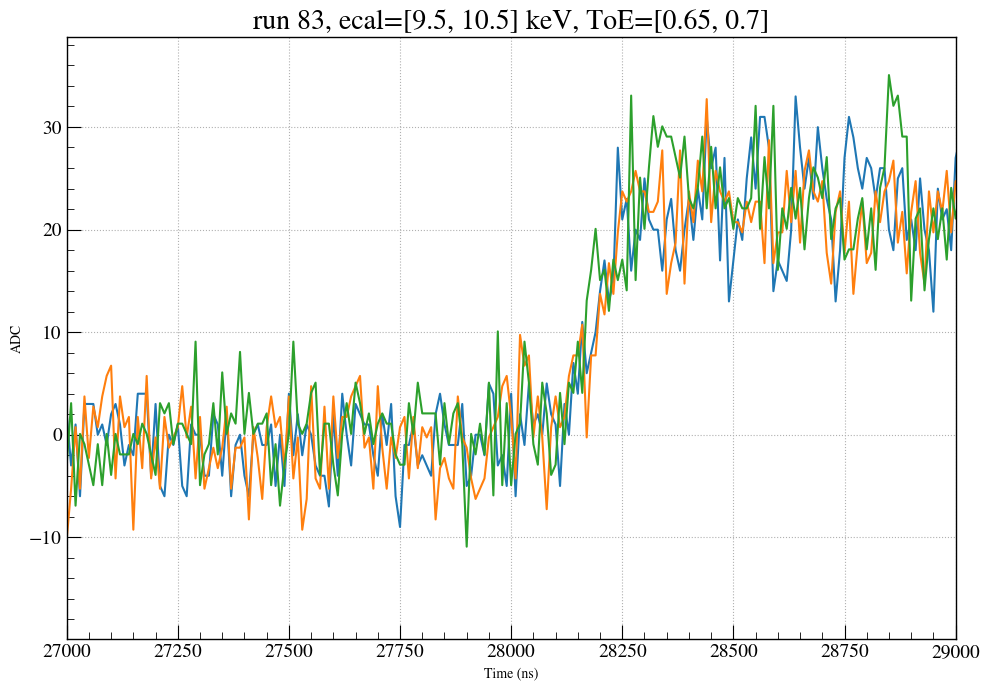

In [39]:
# get raw wfs at 20 keV for ToE=[0.5,0.6]
ecal_range = [9.5, 10.5]
toe_range = [0.65, 0.7]

ecal_cut = (df.trapEmax_cal_keV > ecal_range[0]) & (df.trapEmax_cal_keV < ecal_range[1])
toe_cut = (df.ToE > toe_range[0]) & (df.ToE < toe_range[1])

cut = ecal_cut & toe_cut

nwfs = 3
d = df[cut]
d = d.sample(nwfs, random_state=1)

wfs = kutils.get_raw_wfs(d, 
                         random=False, 
                         display_params=['trapEmax_cal_keV', 'tp_0', 'tp_50', 'stp_20', 'tp_max'], 
                         align_at = 'tp_0',
                         lw=1.5)
plt.title('run '+str(run)+', ecal='+ str(ecal_range)+ ' keV, ToE='+str(toe_range))
plt.xlim(27000, 29000)

Text(0, 0.5, 'amplitude')

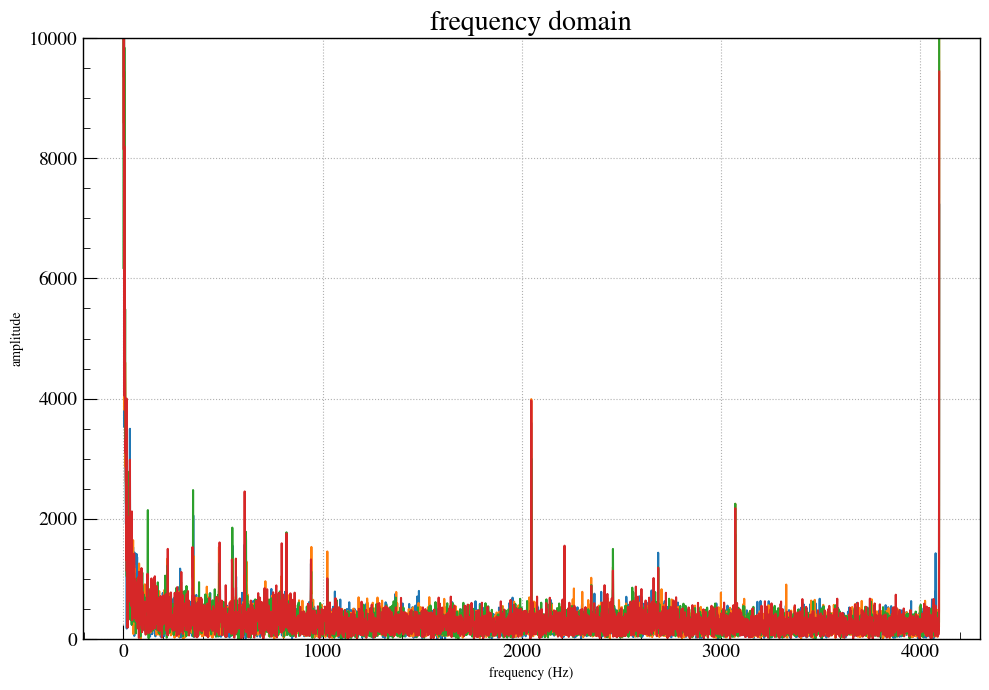

In [5]:
for wf in wfs:
    wf_fft = np.fft.rfft(wf)
    plt.plot(np.abs(wf_fft), lw=1.5)
plt.ylim(0, 10000)
plt.title('frequency domain')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')

Text(0.5, 1.0, 'Superpulses for different event types (aligned at stp_20)')

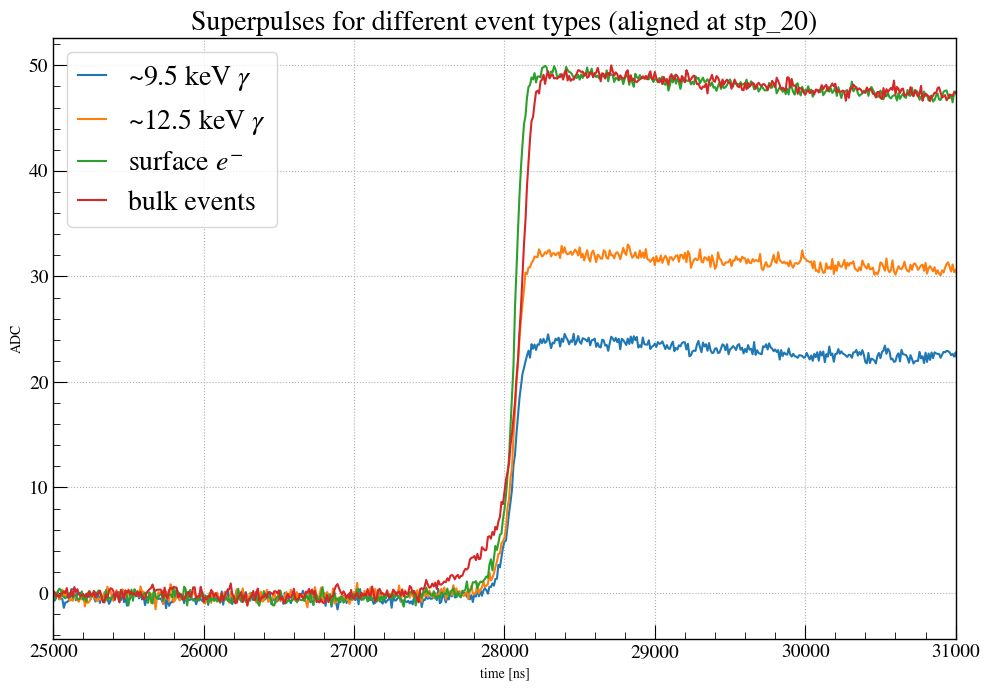

In [48]:
lw = 1.5
nwfs = 100
random_state = 10
align_at = 'stp_20'

superpulses = []


# 9.4 keV gamma events
ecal_range = [9.5, 10.5]
toe_range = [0.65, 0.7]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])

d = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               superpulse_label='~9.5 keV $\gamma$',
               lw=lw)
superpulses.append(sp)


# 12.5 keV gamma events
ecal_range = [13,14]
toe_range = [0.65, 0.7]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])

d = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               superpulse_label='~12.5 keV $\gamma$',
               lw=lw)
superpulses.append(sp)

# surface electron events
ecal_range = [20,21]
toe_range = [0.65, 0.7]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])


d = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               superpulse_label='surface $e^{-}$',
               lw=lw)
superpulses.append(sp)


# bulk events
ecal_range = [20,21]
toe_range = [0.55, 0.60]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])


d = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               superpulse_label='bulk events',
               lw=lw)
superpulses.append(sp)
plt.ylabel('ADC')
plt.title('Superpulses for different event types (aligned at '+align_at+')')


# trap filter

       trapEmax_cal_keV     tp_0  run  cycle  run  cycle  run  cycle  run  \
36452         20.366375  38910.0   83   3530   83   3530   83   3530   83   

       cycle  run  cycle  run  cycle  run  cycle  
36452   3530   83   3530   83   3530   83   3530  




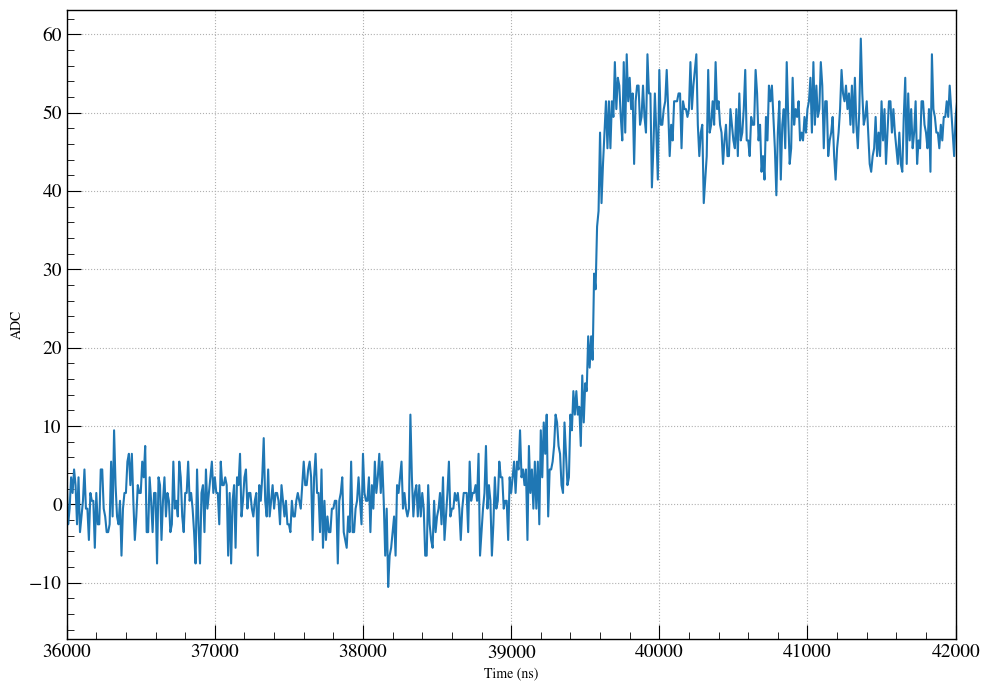

In [82]:
d = d.sample(n=1, random_state=1)
wf = kutils.get_raw_wfs(d, lw=1.5, align_at=None)

In [52]:
import pygama.dsp.processors as proc

3967

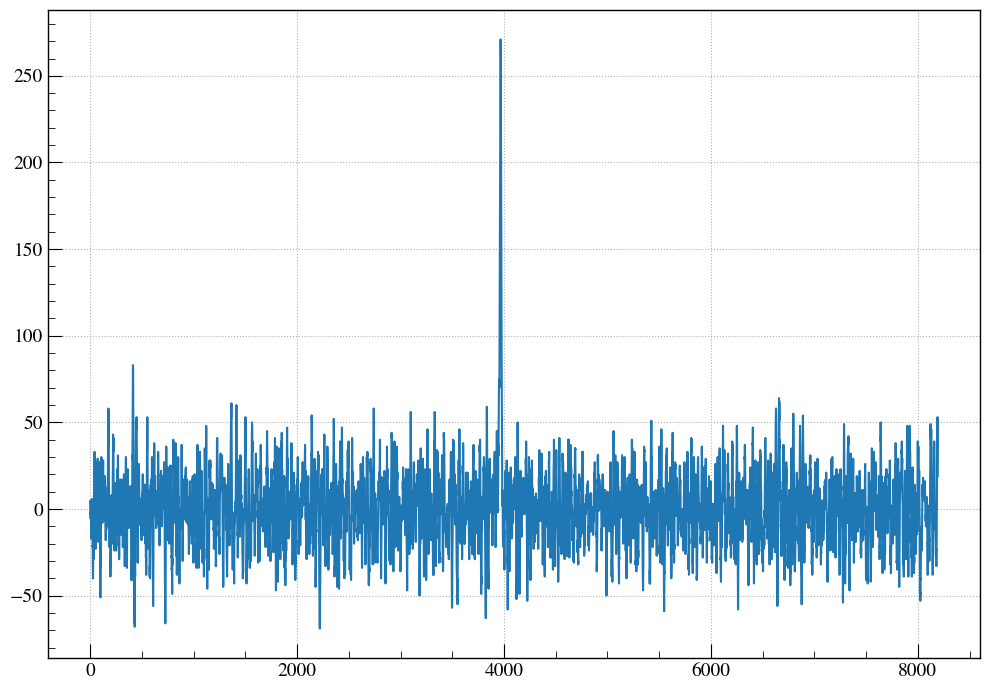

In [83]:
trapezoid = [800, 200]
triangle = [10, 1]
proc.trap_filter(wf, *triangle, wf_out)
plt.plot(wf_out[0], lw=1.5)
#plt.xlim(2500, 4000)
np.argmax(wf_out[0])

       trapEmax_cal_keV     tp_0  run  cycle  run  cycle  run  cycle  run  \
36452         20.366375  38910.0   83   3530   83   3530   83   3530   83   

       cycle  run  cycle  run  cycle  run  cycle  run  cycle  run  cycle  
36452   3530   83   3530   83   3530   83   3530   83   3530   83   3530  




4763

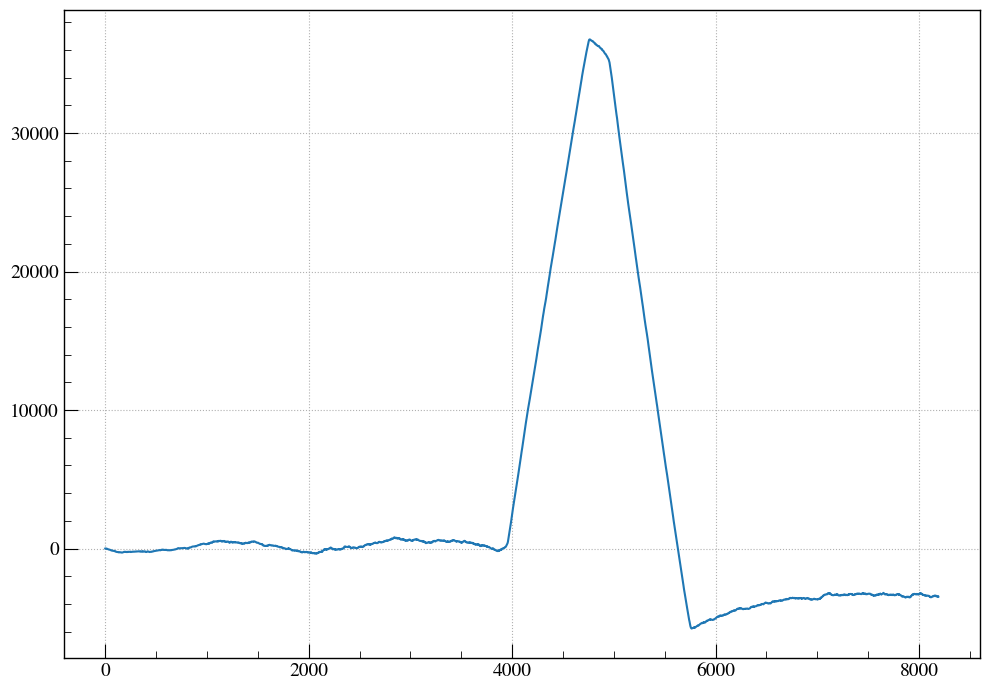

In [85]:
wf = kutils.get_raw_wfs(d, lw=1.5, align_at=None, plot=False)
wf_out = wf
proc.trap_filter(wf, *trapezoid, wf_out)
plt.plot(wf_out[0], lw=1.5)
#plt.xlim(2500, 3500)
np.argmax(wf_out[0])